# COMP5318 - Machine Learning and Data Mining 

## Tutorial 5 - Polynomial Regression, Overfitting and Regularization

**Semester 2, 2019**

**Objectives:**
* To learn about non-linear function approximation using polynomial features. 
* To learn about Overfitting, Underfitting
* To learn about the effect of regularization in order to prevent overfitting.

**Instructions:**
* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "lab5.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "lab5.ipynb" file
* Complete exercises in "lab5.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.


Lecturers: Nguyen Hoang Tran 

Tutors: Fengxiang He, Shaojun Zhang, Fangzhou Shi, Yang Lin, Iwan Budiman, Zhiyi Wang, Canh Dinh, Yixuan Zhang, Rui Dong, Haoyu He, Dai Hoang Tran, Peibo Duan

 ------------------------------------------------------------------------------------------------------------------

Generate nonlinear data

In [1]:
import numpy as np

nTrain = 30
nTest = 20
np.random.seed(1)
xTrain = np.random.rand(nTrain, 1)*5
yTrain = 3*(xTrain -2) * (xTrain - 3)*(xTrain-4) +  10 * np.random.randn(nTrain, 1)
xTest = (np.random.rand(nTest,1) -1/8) *8
yTest = 3*(xTest -2) * (xTest - 3)*(xTest-4) +  10*np.random.randn(nTest, 1)

Plot training and testing dataset 

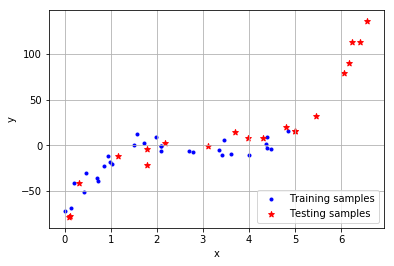

In [2]:
import matplotlib.pylab as pl
%matplotlib inline
pl.scatter(xTrain, yTrain,marker='.', color = 'b',label = 'Training samples')
pl.scatter(xTest, yTest, marker='*', color='r',label = 'Testing samples')
pl.xlabel('x')
pl.ylabel('y')
pl.legend(loc='lower right')
pl.grid()

standardization/normalization dataset

In [3]:
def standardData(z, mean, std): 
    z_standard = (z - mean)/ std
    return z_standard

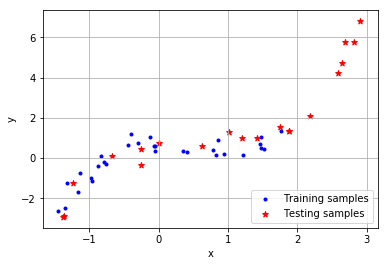

In [4]:
xTrain_n = standardData(xTrain,xTrain.mean(),xTrain.std())
yTrain_n = standardData(yTrain,yTrain.mean(),yTrain.std())
xTest_n  = standardData(xTest,xTrain.mean(),xTrain.std())
yTest_n  = standardData(yTest,yTrain.mean(),yTrain.std())
bias = 0.01
xMin = xTrain_n.min() - bias
xMax = xTrain_n.max() + bias
if(xTrain_n.min() > xTest_n.min()):
    xMin = xTest_n.min() - bias
if(xTrain_n.max() < xTest_n.max()):
    xMax = xTest_n.max() + bias

pl.scatter(xTrain_n, yTrain_n,marker='.', color = 'b',label = 'Training samples')
pl.scatter(xTest_n, yTest_n, marker='*', color='r',label = 'Testing samples')
pl.xlabel('x')
pl.ylabel('y')
pl.legend(loc='lower right')
pl.grid()

### 1.Polynomial Regression 

In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x), and has been used to describe nonlinear phenomena such as the growth rate of tissues,[1] the distribution of carbon isotopes in lake sediments,[2] and the progression of disease epidemi

***Objective***: Estimate (a.k.a. predict or query) outputs for unknown inputs, given the training data $\{\mathbf{x},\mathbf{y}\}$ with datasize $n$.

We can use a nonlinear mapping:
 \begin{equation}
    \phi(x): x \in R^D \leftarrow z \in R^M 
\end{equation}
$\phi(x)$ is a polynomial feature matrix
* M is dimensionality of new features z (or $\Phi(x)$)
* M could be greater than, less than, or equal to D
Consider the non linear model with:
\begin{equation}
\phi(x) = \begin{bmatrix}
1\\
x\\
x^2\\
.\\
.\\
.\\
x^M\\
\end{bmatrix} 
\rightarrow  f(x)= w^T \phi(x) = w_0 +  w_1 x + w_2 x^2 + w_3 x^3 + ... + w_m x^m = w_0 + \sum_{m=1}^M w_mx^m
\end{equation}

Residual sum of squares:
\begin{equation}
\sum_n[w^T \phi(x_n)-y_n]^2
\end{equation}


The LMS solution can be formulated with the new design matrix:
\begin{equation}
  \mathbf{\Phi} = \begin{bmatrix}
  \phi(x_1)^T\\
  \phi(x_2)^T\\
  .\\
  .\\
  .\\
  \phi(x_N)^T
  \end{bmatrix} =  \begin{bmatrix}
  x_1^0 & x_1^1 & \cdots & x_1^m \\
  x_2^0 & x_2^1 & \cdots & x_2^m \\
  x_3^0 & x_3^1 & \cdots & x_3^m \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_N^0 & x_N^1 & \cdots & x_N^m
 \end{bmatrix} \in R^{NxM},  \quad 
  \mathbf{w^{LSM}} = (\mathbf{\Phi}^{\top}\mathbf{\Phi})^{-1}\mathbf{\Phi^{\top} y}
\end{equation}

**Exercise 1.1**: Complete "TODO:" sections.

Define a Python method to generate the polynomial feature matrix. It will be used to transform $\mathbf{x}$ to $\mathbf{\phi(x)}$

In [31]:


def generate_feature_mat(x_in, m):
    # TODO:
    ϕ = x_in ** np.arange(m + 1)
    
    return ϕ

In [32]:
generate_feature_mat(xTrain, 2)

array([[1.00000000e+00, 2.08511002e+00, 4.34768381e+00],
       [1.00000000e+00, 3.60162247e+00, 1.29716844e+01],
       [1.00000000e+00, 5.71874087e-04, 3.27039971e-07],
       [1.00000000e+00, 1.51166286e+00, 2.28512461e+00],
       [1.00000000e+00, 7.33779454e-01, 5.38432287e-01],
       [1.00000000e+00, 4.61692974e-01, 2.13160402e-01],
       [1.00000000e+00, 9.31301057e-01, 8.67321659e-01],
       [1.00000000e+00, 1.72780364e+00, 2.98530540e+00],
       [1.00000000e+00, 1.98383737e+00, 3.93561072e+00],
       [1.00000000e+00, 2.69408367e+00, 7.25808682e+00],
       [1.00000000e+00, 2.09597257e+00, 4.39310102e+00],
       [1.00000000e+00, 3.42609750e+00, 1.17381441e+01],
       [1.00000000e+00, 1.02226125e+00, 1.04501806e+00],
       [1.00000000e+00, 4.39058718e+00, 1.92772558e+01],
       [1.00000000e+00, 1.36937966e-01, 1.87520065e-02],
       [1.00000000e+00, 3.35233755e+00, 1.12381671e+01],
       [1.00000000e+00, 2.08652401e+00, 4.35358245e+00],
       [1.00000000e+00, 2.79344

**Train:** Evaluate $\phi(x)$ and hence determine the best weights $\mathbf{w^{LSM}}$.

In [37]:
m = 3
ϕ_x = generate_feature_mat(xTrain_n, m)

#TODO:
w_lsm = np.linalg.pinv(np.dot(ϕ_x.T,ϕ_x)).dot(np.dot(ϕ_x.T,yTrain_n))



"""
Attention! - use np.linalg.pinv instead of np.linalg.inv. 
This is because, when a matrix is singular, we may have to obtain the Moore-Penrose pseudoinverse,
especially when the polynomial order is very high. 
"""

'\nAttention! - use np.linalg.pinv instead of np.linalg.inv. \nThis is because, when a matrix is singular, we may have to obtain the Moore-Penrose pseudoinverse,\nespecially when the polynomial order is very high. \n'

Generate 100 query inputs $\mathbf{x}_q$ from xMin,xMax

In [38]:
x_q = np.linspace(xMin,xMax,100)[:,np.newaxis]

**Predict:** 
Evaluate $\mathbf{\phi(x_q)}$ and hence determine outputs $\hat{\mathbf{y}}$.

In [39]:
ϕ_x_q = generate_feature_mat(x_q, m) #generate feature matrix for x_q
y_hat = ϕ_x_q.dot(w_lsm) #estimated outputs (N_qx1 matrix)

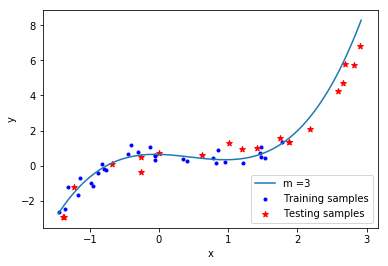

In [40]:
pl.scatter(xTrain_n, yTrain_n,marker='.', color = 'b',label = 'Training samples')
pl.scatter(xTest_n, yTest_n, marker='*', color='r',label = 'Testing samples')
pl.plot(x_q, y_hat,label= "m =" + str(m))
pl.xlabel('x')
pl.ylabel('y')
pl.legend(loc='lower right')

### 2. Overfitting and Regularization

**Exercise 2.1**: Perform regression for $m \in \{1, 3, 4, 10\}$. Identify the models that **under-fit** and **over-fit**. Discuss how to choose a suitable model. 

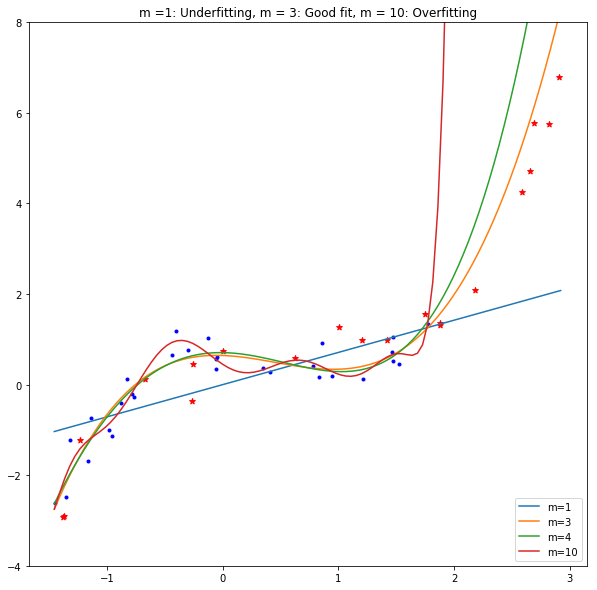

In [41]:
m_vals = np.array([1,3,4,10])
pl.figure(figsize=(10,10))
pl.scatter(xTrain_n, yTrain_n, marker='.', color='b')
pl.scatter(xTest_n, yTest_n, marker='*', color='r')
for m in m_vals:
    ϕ_x = generate_feature_mat(xTrain_n,m) 
    w_lsm = (np.linalg.pinv(ϕ_x.T.dot(ϕ_x))).dot(ϕ_x.T.dot(yTrain_n))
    ϕ_x_q = generate_feature_mat(x_q, m)
    y_hat = ϕ_x_q.dot(w_lsm)
    pl.plot(x_q, y_hat, label='m={}'.format(m))
pl.legend(loc='lower right')
pl.ylim([-4,8])
pl.title("m =1: Underfitting, m = 3: Good fit, m = 10: Overfitting")
pl.show()

Tikhonov ($\mathrm{L}^2$) regularization can be used to overcome overfitting. 

\begin{equation}
  \mathbf{w^{LMS}} = (\mathbf{\Phi}^{\top}\mathbf{\Phi} + \lambda \mathbf{I})^{-1}\mathbf{\Phi^{\top} y}
\end{equation}

In other words, we can cosider this as a minimization problem in the following form.
\begin{equation}
 \mathbf{w^{LMS}} = \underset{\mathbf{w}}{\operatorname{argmin}} \| \mathbf{w^T\phi(x) - y}\|_2^2
 + \lambda \| \mathbf{w} \|_2^2
\end{equation}

**Exercise 2.2** : Define the loss function between real output and predicted ouput using mean_quare_error

In [44]:
from sklearn.metrics import mean_squared_error
def loss(yPre,y):
    loss = mean_squared_error(y,yPre)
    return loss

**Exercise 2.3**: Test the following code for different values of the regularization parameter $\lambda$ and obsever the changing of traning loss and testing loss. Chosing the best value for regularization parameter

In [ ]:
lambda_val = np.linspace(0,10,100)[:,np.newaxis]
m = 3
trainLoss = []
testLoss = []
for lamb in lambda_val:
    ϕ_x_train = generate_feature_mat(xTrain_n, m)
    ϕ_x_test = generate_feature_mat(xTest_n, m)
    # TODO:
    w_lsm = lamb * ϕ_x_train.T **2
    trainLoss.append(loss(ϕ_x_train.dot(w_lsm),yTrain_n))
    testLoss .append(loss(ϕ_x_test.dot(w_lsm),yTest_n))
pl.plot(lambda_val, trainLoss, marker='.', color='b',label = "Training Loss")
pl.plot(lambda_val, testLoss, marker='.', color='r',label = "Test Loss")
pl.legend()
pl.xlabel('Lambda')
pl.ylabel('Loss')
pl.show()
print()